In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-finetuning-in-mssm/FineTuningMSSM.csv


In [4]:
# Load data from csv
mssm = pd.read_csv("/kaggle/input/predicting-finetuning-in-mssm/FineTuningMSSM.csv")

Note: Data has already been edited for missing values

In [5]:
# Data copies
data = mssm

In [6]:
# Reassign signmu (categorical)
data["signmu"] = data["signmu"].replace({-1:0})

In [7]:
data.describe()

,Fine-Tuning,M1,M2,M3,MHu2,MHd2,signmu,Mq2ii,Ml2ii,Mu2ii,...,Me2ii,Mq233,Ml233,Mu233,Md233,Me233,Tu33,Td33,Te33,tanb
count,14044.000000,14044.000000,14044.000000,14044.000000,1.404400e+04,1.404400e+04,14044.000000,1.404400e+04,1.404400e+04,1.404400e+04,...,1.404400e+04,1.404400e+04,1.404400e+04,1.404400e+04,1.404400e+04,1.404400e+04,14044.000000,14044.000000,14044.000000,14044.000000
mean,650.543697,111.160326,-209.998556,991.692491,2.692925e+06,5.444467e+06,0.561023,4.475116e+06,4.431752e+06,4.296511e+06,...,4.314686e+06,3.908464e+06,4.457535e+06,4.445699e+06,4.391227e+06,5.112217e+06,385.888856,202.196574,39.362826,28.505815
std,219.407052,1753.726252,1879.519332,493.231269,3.146717e+06,2.397999e+06,0.496280,2.576140e+06,2.602727e+06,2.496158e+06,...,2.506439e+06,2.490522e+06,2.474641e+06,2.511566e+06,2.425895e+06,2.369031e+06,1482.240884,745.672725,1157.392084,10.913495
min,0.548434,-2999.633790,-2999.633790,0.366211,-8.934082e+06,-3.313477e+06,0.000000,1.098633e+03,5.493164e+02,1.647949e+03,...,2.746582e+02,5.493164e+02,1.098633e+03,2.197266e+03,1.098633e+03,2.746582e+03,-2997.070310,-1920.410160,-2998.168950,10.004883
25%,479.141406,-1417.694093,-1971.862795,608.596802,4.875183e+05,3.772705e+06,0.000000,2.243546e+06,2.187241e+06,2.198227e+06,...,2.234619e+06,1.776489e+06,2.423584e+06,2.336243e+06,2.465332e+06,3.237396e+06,-785.888672,-362.548828,-818.115234,19.316406
50%,667.524474,197.753906,-379.028320,1005.981450,2.776794e+06,5.787048e+06,1.000000,4.473084e+06,4.354706e+06,4.173157e+06,...,4.204468e+06,3.630707e+06,4.359924e+06,4.339874e+06,4.265167e+06,5.265198e+06,461.791992,208.374023,54.199219,27.858887
75%,839.018235,1633.483885,1533.737185,1382.995610,5.040527e+06,7.441040e+06,1.000000,6.676392e+06,6.686279e+06,6.330460e+06,...,6.382095e+06,5.894714e+06,6.522583e+06,6.553619e+06,6.328125e+06,7.127930e+06,1612.152102,759.887695,901.977539,37.116699
max,999.988044,2999.816890,2998.901370,2166.320800,8.995605e+06,8.998901e+06,1.000000,8.998901e+06,8.998901e+06,8.998901e+06,...,8.998901e+06,8.997253e+06,8.997253e+06,8.997803e+06,8.999451e+06,8.998901e+06,2999.267580,2441.894530,2997.802730,49.997559


In [8]:
data.head()

,Fine-Tuning,M1,M2,M3,MHu2,MHd2,signmu,Mq2ii,Ml2ii,Mu2ii,...,Me2ii,Mq233,Ml233,Mu233,Md233,Me233,Tu33,Td33,Te33,tanb
0,973.655845,-164.06250,-257.81250,1746.093750,773437.50,6398437.50,0,4816406.25,7277343.750,2777343.750,...,5238281.25,246093.75,3410156.25,2425781.25,3902343.75,8050781.25,1898.43750,-164.06250,1757.81250,34.531250
1,135.551970,1101.56250,-1054.68750,316.406250,351562.50,6820312.50,0,1792968.75,3550781.250,5238281.250,...,949218.75,2425781.25,6996093.75,2636718.75,5800781.25,3339843.75,257.81250,1101.56250,-1289.06250,45.468750
2,671.548596,503.90625,-2074.21875,1212.890620,7558593.75,8402343.75,0,8279296.88,6802734.380,615234.375,...,3638671.88,6099609.38,2759765.62,8982421.88,2126953.12,8947265.62,-2003.90625,503.90625,-972.65625,43.046875
3,546.735354,-808.59375,-2636.71875,1494.140620,8121093.75,6714843.75,0,6873046.88,896484.375,8771484.380,...,4482421.88,8068359.38,7541015.62,1388671.88,6345703.12,7541015.62,2683.59375,-808.59375,-410.15625,21.796875
4,401.214343,-11.71875,-2683.59375,908.203125,4605468.75,5730468.75,0,7224609.38,3357421.880,8419921.880,...,2724609.38,5185546.88,4939453.12,7505859.38,2619140.62,6486328.12,2167.96875,-11.71875,1699.21875,18.984375


In [9]:
# Assign training, target sets
train_X = data.drop(['Fine-Tuning'],axis=1)
train_Y = data['Fine-Tuning']

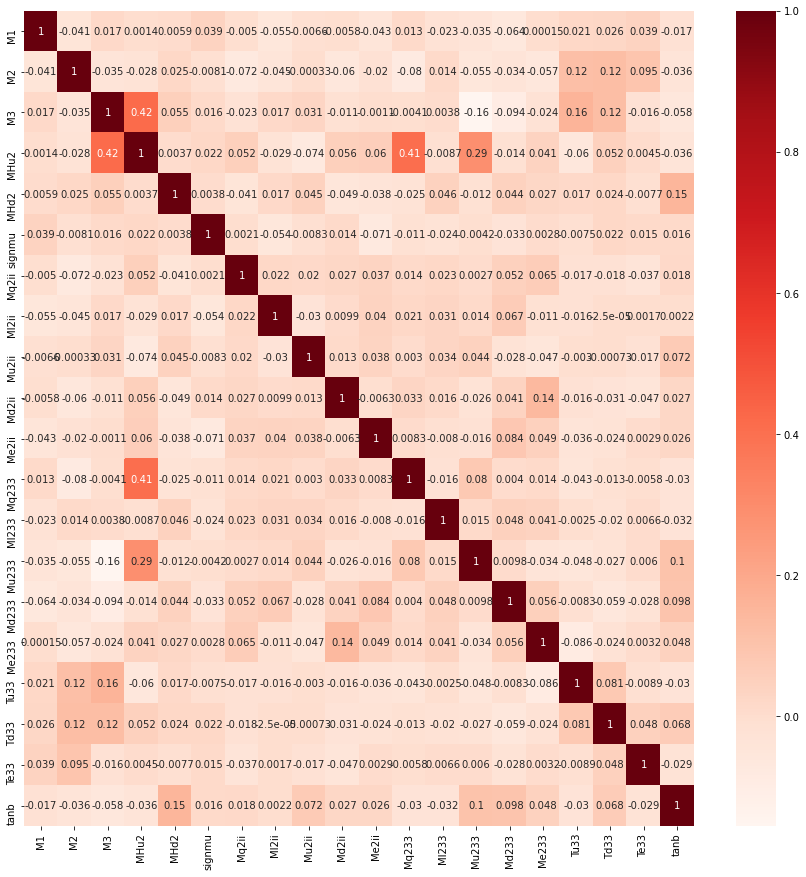

In [10]:
# Correlation matrix
plt.figure(figsize=(15,15))
cor = train_X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_X,train_Y,test_size=0.25,random_state=0)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# Stochastic gradient descent
sgd = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', SGDRegressor(max_iter=1000))
])
sgd.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SGDRegressor())])

In [13]:
# SGD metrics
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = sgd.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error : ", rmse)
print("R^2 : ",r2)

Root Mean Squared Error :  176.2727742649263
R^2 :  0.35951026955576526


In [14]:
# Extreme gradient boosting

import xgboost as xgb
xgbr = xgb.XGBRegressor(n_estimators=1000,
                        learning_rate=0.01,
                        max_depth=5,
                        subsample=0.9,
                        colsample_bytree=0.8,
                        gamma=1,
                        random_state=0,
                        verbosity=0)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [15]:
# XGBR metrics

y_pred = xgbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error : ", rmse)
print("R^2 : ",r2)

Root Mean Squared Error :  90.88055989791245
R^2 :  0.8297513490447201


In [16]:
# Standardized data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
# NN design

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_X.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer=Adam(learning_rate=0.01),
                metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.losses.MeanAbsolutePercentageError()])
  return model

In [18]:
model = build_model()
model.fit(
  X_train, y_train,
  epochs=150, validation_split = 0.2, verbose=0)
mse, rmse, mape = model.evaluate(X_test, y_test)

110/110 [==============================] - 0s 1ms/step - loss: 1958.6550 - root_mean_squared_error: 44.2567 - mean_absolute_percentage_error: 23.9774


In [19]:
## NN metrics

y_pred = model.predict(X_test)
mape = tf.keras.losses.MeanAbsolutePercentageError()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error : ", rmse)
print("Mean Absolute Percentage Error : ", mape(y_test, y_pred).numpy())
print("R^2 : ",r2)

Root Mean Squared Error :  44.25669952036815
Mean Absolute Percentage Error :  66.10016
R^2 :  0.9596261897887204


In [20]:
# Absolute/percentage errors

mssm['Predicted Fine-Tuning'] = pd.DataFrame(model.predict(scaler.fit_transform(train_X)))
mssm['Absolute Percentage Error'] = ((mssm['Predicted Fine-Tuning']-mssm['Fine-Tuning'])/mssm['Fine-Tuning']).abs()*100
mssm[['Fine-Tuning','Predicted Fine-Tuning','Absolute Percentage Error']].sort_values(by=['Absolute Percentage Error'],ascending=False).head(20)

,Fine-Tuning,Predicted Fine-Tuning,Absolute Percentage Error
3411,1.121543,740.966492,65966.681406
12856,48.492411,1568.490356,3134.506865
10595,43.925668,887.781982,1921.100712
9515,22.401055,-191.128494,953.212014
3295,14.557647,127.583694,776.403265
11882,0.548434,-2.793566,609.370923
8989,70.102873,135.620728,93.459587
6639,657.344214,217.168381,66.962761
157,83.259017,126.148293,51.513069
12984,56.536158,84.543472,49.538766


> Errors are large on test set - acquiring larger data set first before retraining/testing other models